In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
df=pd.read_csv('zoo.csv')
df.head()


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# Analysis

In [2]:
# Filling missing values
df.isnull().mean()

animal_name    0.0
hair           0.0
feathers       0.0
eggs           0.0
milk           0.0
airborne       0.0
aquatic        0.0
predator       0.0
toothed        0.0
backbone       0.0
breathes       0.0
venomous       0.0
fins           0.0
legs           0.0
tail           0.0
domestic       0.0
catsize        0.0
class_type     0.0
dtype: float64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
columns = ['airborne','hair','feathers','eggs', 'milk','domestic','class_type']
#sns.pairplot(df[columns]);
#plt.tight_layout();
#plt.show()

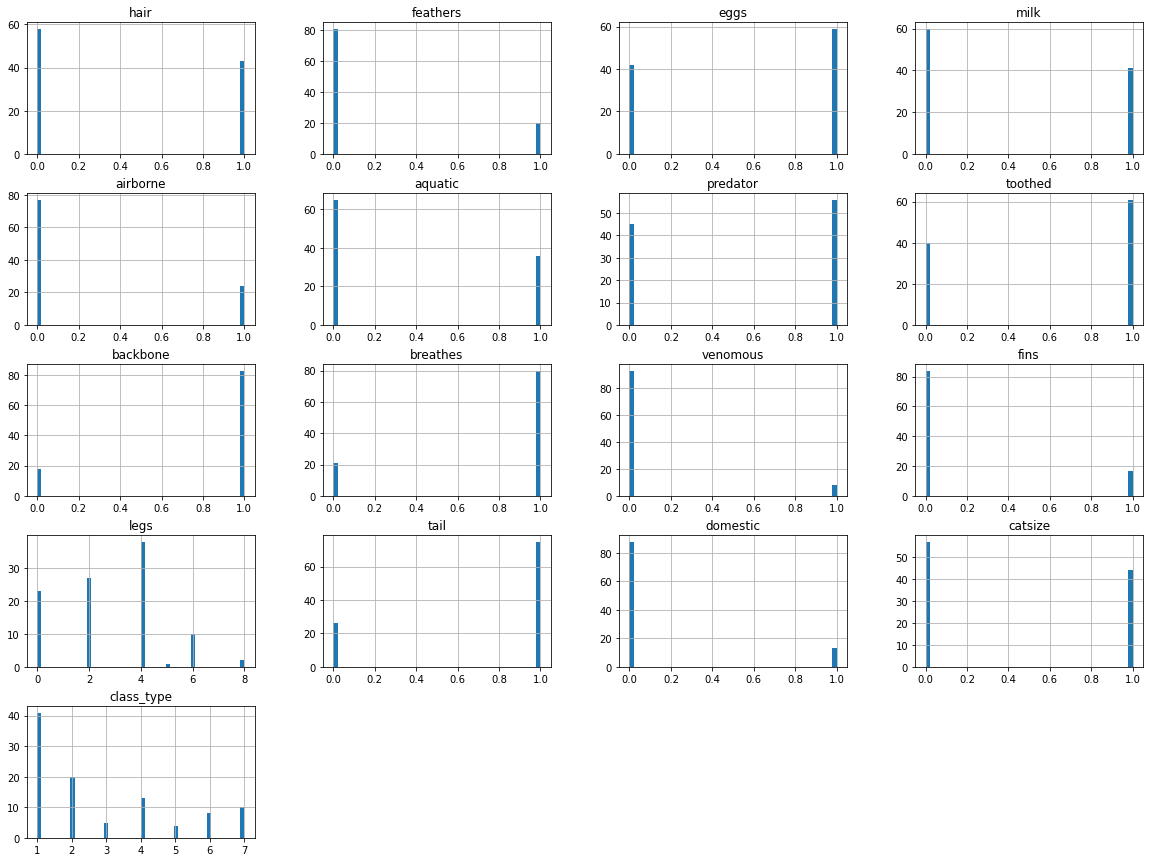

In [5]:
df.hist(bins=50,figsize=(20,15))
plt.show()

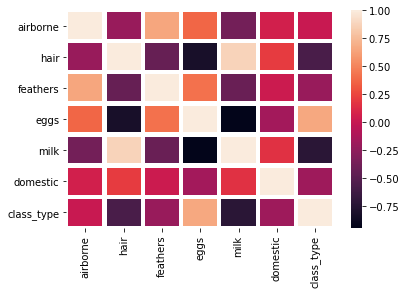

In [6]:
import numpy as np

cm=df[columns].corr()
hm=sns.heatmap(data =cm,cbar = True,annot = False,square = False,xticklabels =columns,yticklabels = columns,linewidths = 3.2)
plt.show()

In [7]:
mcorr=df.corr()
mcorr["class_type"].sort_values(ascending=False)

class_type    1.000000
eggs          0.661825
aquatic       0.326639
venomous      0.321476
legs          0.131693
fins          0.099430
predator      0.061179
airborne      0.022677
domestic     -0.181043
feathers     -0.197520
toothed      -0.471527
breathes     -0.519308
catsize      -0.521030
hair         -0.562384
tail         -0.631830
milk         -0.723683
backbone     -0.828845
Name: class_type, dtype: float64

# Sklearn classifiers

In [8]:
X = df.drop(['class_type','animal_name'], axis=1)

In [9]:
y = df['class_type']

In [10]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42, solver='liblinear')

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
91,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0
64,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
28,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
83,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1
71,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,1
14,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0
92,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1


In [13]:
log_reg = LogisticRegression(random_state=42).fit(X_train, y_train)

In [14]:
y_test_pred = log_reg.predict_proba(X_test)

In [15]:
X_test.shape
log_reg.classes_

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [16]:
from sklearn.metrics import  roc_curve, classification_report, auc , accuracy_score
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred[:,1], pos_label=2)

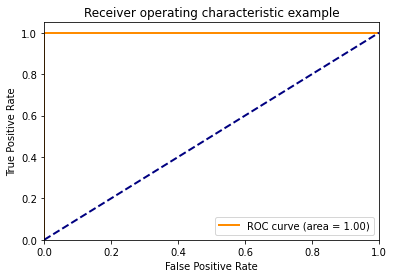

In [17]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [18]:
print(classification_report(y_test, log_reg.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.94        31
   macro avg       0.79      0.81      0.79        31
weighted avg       0.92      0.94      0.92        31



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
accuracy_score(y_test, log_reg.predict(X_test))

0.9354838709677419

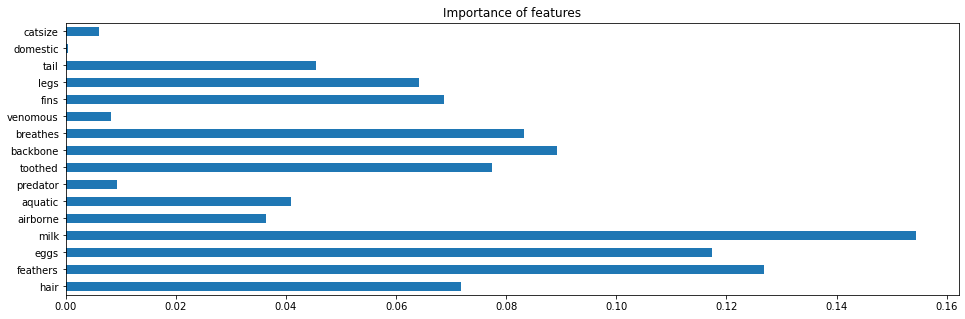

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
bestfeatures2 = ExtraTreesClassifier()
fit2 = bestfeatures2.fit(X,y)
feat_importances = pd.Series(fit2.feature_importances_, index=X.columns)
plt.figure(figsize = (16,5))
feat_importances.plot(kind='barh')
plt.title("Importance of features")
plt.show()

# Custom logistic regression classifier

In [21]:
def normalize_(X,mean,std):
    X_new = (X-mean)/std;
    return X_new

In [44]:
def normalize(X):
    mean = np.mean(X,axis=0);
    std = np.std(X,axis=0);
    X_new = (X-mean)/std;
    return X_new, mean, std

In [45]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.column_stack((ones, X))
    return X_new

In [46]:
def sigmoid(z):
    g = 1/(1+np.exp(z*-1));
    return g

In [47]:
def h(X, theta):
    z = X.dot(theta)
    return sigmoid(z)

In [48]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m ==0:
        return None
    temp =h(X,theta);
    J = sum(-1*y*np.log(temp) + (1-y)*np.log(1-temp) )/m;
    return J

In [49]:
def derivative_theta(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    d_theta = X_new.T.dot(h(X_new,theta) - y_new)/m;
    
    return d_theta

In [50]:
def gradient_descent(X, y, theta, alpha, epsilon, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    
    J = cost_function(X,y,theta);
    
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        
        theta = theta - alpha* derivative_theta(X,y,theta);
        
        
        J = cost_function(X,y,theta);
        
        J_history.append(J)
        
        if i % 1000 == 0 and print_J == True:
            print(J)
        
        if abs(J-J_history[-2]) < epsilon:
            break
            
    return theta, J_history

In [65]:

def predict_(X, mean, std, models,labels):
    
    X_new =normalize_(X,mean,std);
    X_new = prepare_X(X_new);
    predictions_ = [];
    for theta in models:
        predictions_.append(h(X_new,theta))
    
    predict_ =[];
    for p in range(0,len(predictions_[0])):
        max_ = abs(predictions_[0][p]);
        max_label  =labels[0];
        for l in range(1,len(labels)):
            if(abs(predictions_[l][p]) > max_):
                max_ = abs(predictions_[l][p]);
                max_label  =labels[l];
        predict_.append(max_label);
    return predict_

In [79]:
X = df.drop(['class_type','animal_name'], axis=1)

In [80]:
y = df['class_type']

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:

print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(70, 16), y=(70,)
Test set: X=(31, 16), y=(31,)


In [83]:
X_new,mean,std = normalize(X_train)

In [84]:
X_new = prepare_X(X_new)

In [85]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='error')

In [86]:
enc.fit(np.array(y).reshape(-1,1))

OneHotEncoder()

In [87]:
enc.categories_


[array([1, 2, 3, 4, 5, 6, 7], dtype=int64)]

In [88]:
y_train_enc  = enc.transform(np.array(y_train).reshape(-1,1)).toarray()
models =[]

In [102]:
for m in range(0,6):
    theta = np.zeros((X_new.shape[1], 1))
    y_new =y_train_enc[:,m].reshape((X_train.shape[0], 1))
    new_theta, Js = gradient_descent(X_new, y_new, theta, 0.01, 1e-5, 1000, False)
    models.append(theta)


In [107]:
y_train_pred=predict_(X_train,mean,std,models,[1, 2, 3, 4, 5, 6, 7])
y_train_pred


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [98]:
accuracy_score(y_train, y_train_pred)

0.37142857142857144

In [100]:
y_test_pred=predict_(X_test,mean,std,models,[1, 2, 3, 4, 5, 6, 7])
accuracy_score(y_test, y_test_pred)

0.4838709677419355